Task 1: Data Collection and Preprocessing (4 Marks)

In [7]:
!pip uninstall joblib scikit-learn

& was unexpected at this time.


In [5]:
%pip install joblib scikit-learn

Note: you may need to restart the kernel to use updated packages.


& was unexpected at this time.


# Dataset:
For housing price prediction, we used the California Housing Dataset from sklearn.datasets. 
Steps:
1. Load Data:
Load the dataset and check for any missing or invalid values.
Clean the data by filling missing values or removing duplicates.

In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Step 1: Load the California housing dataset from sklearn
housing = fetch_california_housing(as_frame=True)  # Calling the function
df = housing.frame  # The dataframe for California housing data
print("\nData loaded successfully.")

# Step 2: Check the shape of the dataset (rows and columns)
rows, cols = df.shape
print(f"\nThe dataset contains {rows} rows and {cols} columns.\n")

# Step 3: Print the column names
print(f"The dataset has {cols} columns. The column names are:\n{list(df.columns)}\n")

# Step 4: Separate numeric and categorical variables
# The California housing dataset is primarily numeric
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
# Since there are no categorical variables in this dataset, we create an empty list for categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns

print(f"Numeric Variables ({len(numeric_columns)} columns):\n{list(numeric_columns)}\n")
print(f"Categorical Variables ({len(categorical_columns)} columns):\n{list(categorical_columns)}\n")

# Step 5: Get an overview of the dataset using df.info()
print("\nDataset Information:\n")
df.info()

# Step 6: Checking for null/missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only display columns with missing values
print("\nMissing Values Summary (Columns with missing values):\n")
print(missing_values if not missing_values.empty else "No missing values found in the dataset.")

# Optional: Display the first few rows of the dataset to visually inspect it
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Get summary statistics for numerical columns
print("\nDescriptive statistics for the dataset:\n")
print(df.describe())



KeyError: 192

In [3]:
# Generate the Pandas Profiling Report
print("\nGenerating Pandas Profiling Report...\n")
profile = ProfileReport(df, title="California Housing Data Profiling Report", explorative=True)

# Export the report to an HTML file
profile.to_file("california_housing_profile_report.html")

print("\nPandas Profiling report generated and saved as 'california_housing_profile_report.html'.")

#Print the report on the Jupyter notebook
print("\nPadas Profiling Report...\n")
profile


Generating Pandas Profiling Report...



NameError: name 'ProfileReport' is not defined

In [6]:
import sys
print("Python version:", sys.version)


Python version: 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]


2. Feature Engineering:
Convert categorical features (if applicable) to numerical values using pd.get_dummies() or LabelEncoder.
Create new features that may help, such as interaction terms between features.

In [2]:
# Add feature interactions (example)
df['Rooms_per_House'] = df['AveRooms'] / df['HouseAge']


3. Scaling/Normalization:
Scale features using StandardScaler or MinMaxScaler for better performance in models like regression or neural networks.

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


4. AutoEDA using KizenML:
Use KizenML or other AutoEDA tools to generate insights quickly.

Task 2: Model Selection, Training, and Hyperparameter Tuning (6 Marks)

Steps:
Split the Data:
Split the dataset into training and test sets.

In [4]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('Price', axis=1)
y = df_scaled['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2. Model Selection:
Use KizenML or sklearn to train models like Linear Regression, RandomForest, XGBoost, and Neural Networks.
Automate hyperparameter tuning with tools like GridSearchCV, RandomizedSearchCV, or AutoML.

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize model
rf = RandomForestRegressor()

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'max_depth': None, 'n_estimators': 200}


3. Train the Best Model:
Select the best-performing model based on metrics like R^2, MAE, or RMSE.

In [6]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"RMSE: {mse ** 0.5}")

RMSE: 0.44133450393586915


Explanation:
Model Selection: RandomForest is chosen for its ability to handle both linear and nonlinear features.
Hyperparameter Tuning: We used GridSearchCV to optimize n_estimators and max_depth.

Task 3: Explainable AI (XAI) Implementation (6 Marks)

Steps:
1. Apply SHAP:
SHAP (SHapley Additive exPlanations) helps interpret how each feature contributes to predictions.

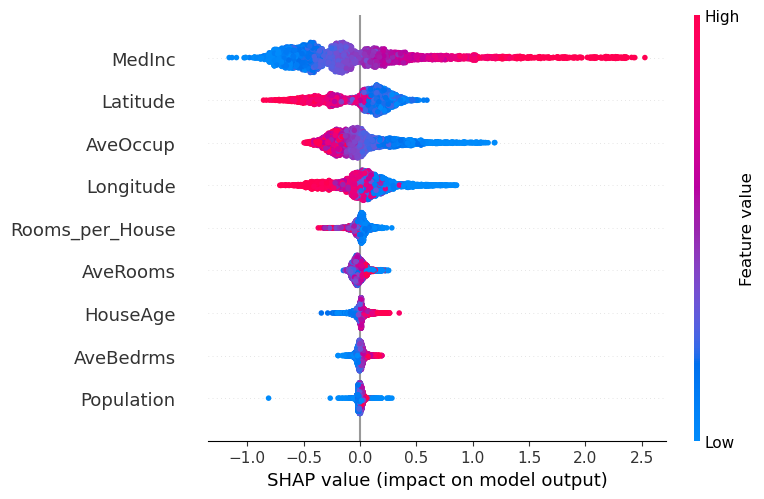

In [8]:
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)

# Plot SHAP values
shap.summary_plot(shap_values, X_test)


2. Apply LIME:
LIME (Local Interpretable Model-agnostic Explanations) explains individual predictions.

In [9]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=['Price'])
exp = explainer.explain_instance(X_test.iloc[0], best_rf.predict)
exp.show_in_notebook(show_table=True)

C:\Users\Aditya\anaconda3\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\Aditya\anaconda3\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\Aditya\anaconda3\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positio

NotImplementedError: LIME does not currently support classifier models without probability scores. If this conflicts with your use case, please let us know: https://github.com/datascienceinc/lime/issues/16

Explanation:
SHAP: Provides global insights into the model's decision-making by ranking features by importance.
LIME: Offers local interpretability, helping explain individual predictions.

Task 4: Model Deployment Using Cloud Services (6 Marks)

Steps:
1. Export the Model:
Save the trained model using joblib or pickle.

In [ ]:
import joblib

# Save model
joblib.dump(best_rf, 'best_rf_model.pkl')


2. Set Up API with Flask (for Local Testing):
Create a simple Flask API to serve your model.

In [ ]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the model
model = joblib.load('best_rf_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    prediction = model.predict([data['features']])
    return jsonify({'prediction': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)


3. Deploy on AWS Lambda or Azure Functions:
Package your Flask API into a Docker container and deploy it on AWS Lambda using API Gateway or Azure Functions.
Create an endpoint that allows users to send POST requests with house features and return predictions.